A notebook to test calculating of SNR, SSIM, and MSE for a filter using a number of randomly generated additive noise problems

# Setup
Here we import the libraries we need

In [1]:
import matplotlib.pyplot as plt # plotting and showing images
import numpy as np # handling arrays
from skimage.io import imread # reading images
#from skimage.measure import compare_ssim as ssim 
from skimage.metrics import structural_similarity as ssim # structural similarity
mse = lambda img1, img2: np.sum(np.power(img1-img2,2))

# Load and Show Phantom

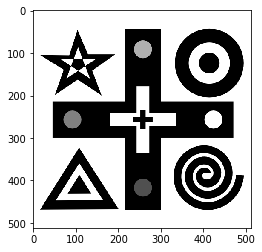

In [16]:
d=np.mean(imread('data/testpattern.png').astype(float),2)
plt.imshow(d, cmap= 'gray')

# Tasks
Evaluate a number of different filters using different noise levels and determine which works the best under which circumstances. The example is done for a uniform filter, and you job is to add 

 1. gaussian
 2. median  
 3. anisotropic diffusion (copy code from exercise 3) 

# Uniform filter

In [17]:
# uniform filter 
scales = [0.1, 0.5, 1, 10, 20, 100];

Ntests = 10;

# initialize arrays for results
mse1 = np.zeros((len(scales), Ntests), dtype = np.float32)
ssim1 = np.zeros((len(scales), Ntests), dtype = np.float32)
snr = np.zeros((len(scales), Ntests), dtype = np.float32)
from scipy.ndimage.filters import uniform_filter
current_filter = lambda img: uniform_filter(img, 5)

# Identify the region for SNR calculation
x1 = 0
x2 = 75
y1 = 0
y2 = 75

for i, c_scale in enumerate(scales):
    for j in range(Ntests):
        x = current_filter(d+c_scale*np.random.uniform(-c_scale, c_scale, size = d.shape))
        # extract a sub image
        sub=x[x1:x2,y1:y2];
        snr[i,j]=np.mean(sub)/np.std(sub) # compute the snr
        mse1[i,j]=mse(d,x);
        ssim1[i,j]=ssim(d,x);    
    # Add some lines here to display the latest image in a subplot

Text(0, 0.5, 'SSIM')

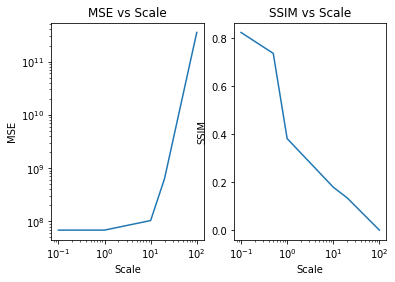

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.loglog(scales,np.mean(mse1,1)) # Add annotations for the plot and axes
ax1.set_title('MSE vs Scale')
ax1.set_xlabel('Scale')
ax1.set_ylabel('MSE')

ax2.semilogx(scales,np.mean(ssim1,1))
ax2.set_title('SSIM vs Scale')
ax2.set_xlabel('Scale')
ax2.set_ylabel('SSIM')

Text(0, 0.5, 'SSIM')

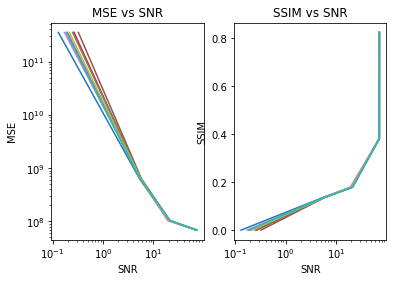

In [19]:
# make a version of the plot showing SNR instead of scale

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.loglog(snr,np.mean(mse1,1)) # Add annotations for the plot and axes
ax1.set_title('MSE vs SNR')
ax1.set_xlabel('SNR')
ax1.set_ylabel('MSE')

ax2.semilogx(snr,np.mean(ssim1,1))
ax2.set_title('SSIM vs SNR')
ax2.set_xlabel('SNR')
ax2.set_ylabel('SSIM')

# Gaussian filter

In [20]:
# gaussian filter 
scales = [0.1, 0.5, 1, 10, 20, 100];

Ntests = 10;

# initialize arrays for results
mse1 = np.zeros((len(scales), Ntests), dtype = np.float32)
ssim1 = np.zeros((len(scales), Ntests), dtype = np.float32)
snr = np.zeros((len(scales), Ntests), dtype = np.float32)
from scipy.ndimage.filters import gaussian_filter
current_filter = lambda img: gaussian_filter(img, 5)

# Identify the region for SNR calculation
x1 = 0
x2 = 75
y1 = 0
y2 = 75

for i, c_scale in enumerate(scales):
    for j in range(Ntests):
        x = current_filter(d+c_scale*np.random.uniform(-c_scale, c_scale, size = d.shape))
        # extract a sub image
        sub=x[x1:x2,y1:y2];
        snr[i,j]=np.mean(sub)/np.std(sub) # compute the snr
        mse1[i,j]=mse(d,x);
        ssim1[i,j]=ssim(d,x);    
    # Add some lines here to display the latest image in a subplot

Text(0, 0.5, 'SSIM')

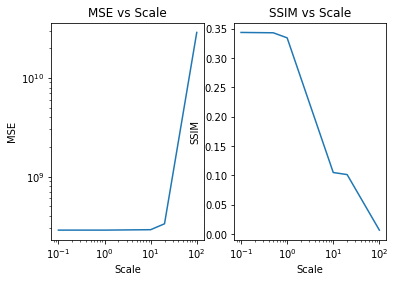

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.loglog(scales,np.mean(mse1,1)) # Add annotations for the plot and axes
ax1.set_title('MSE vs Scale')
ax1.set_xlabel('Scale')
ax1.set_ylabel('MSE')

ax2.semilogx(scales,np.mean(ssim1,1))
ax2.set_title('SSIM vs Scale')
ax2.set_xlabel('Scale')
ax2.set_ylabel('SSIM')

Text(0, 0.5, 'SSIM')

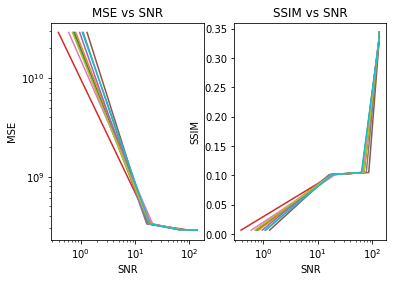

In [22]:
# make a version of the plot showing SNR instead of scale

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.loglog(snr,np.mean(mse1,1)) # Add annotations for the plot and axes
ax1.set_title('MSE vs SNR')
ax1.set_xlabel('SNR')
ax1.set_ylabel('MSE')

ax2.semilogx(snr,np.mean(ssim1,1))
ax2.set_title('SSIM vs SNR')
ax2.set_xlabel('SNR')
ax2.set_ylabel('SSIM')

# Median filter

In [23]:
# median filter 
scales = [0.1, 0.5, 1, 10, 20, 100];

Ntests = 10;

# initialize arrays for results
mse1 = np.zeros((len(scales), Ntests), dtype = np.float32)
ssim1 = np.zeros((len(scales), Ntests), dtype = np.float32)
snr = np.zeros((len(scales), Ntests), dtype = np.float32)
from scipy.ndimage.filters import median_filter
current_filter = lambda img: median_filter(img, 5)

# Identify the region for SNR calculation
x1 = 0
x2 = 75
y1 = 0
y2 = 75

for i, c_scale in enumerate(scales):
    for j in range(Ntests):
        x = current_filter(d+c_scale*np.random.uniform(-c_scale, c_scale, size = d.shape))
        # extract a sub image
        sub=x[x1:x2,y1:y2];
        snr[i,j]=np.mean(sub)/np.std(sub) # compute the snr
        mse1[i,j]=mse(d,x);
        ssim1[i,j]=ssim(d,x);    
    # Add some lines here to display the latest image in a subplot

Text(0, 0.5, 'SSIM')

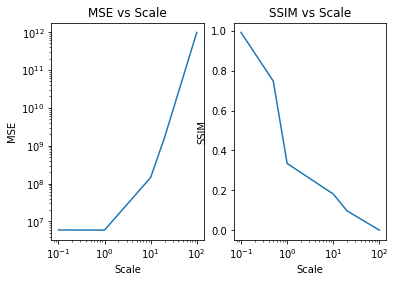

In [24]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.loglog(scales,np.mean(mse1,1)) # Add annotations for the plot and axes
ax1.set_title('MSE vs Scale')
ax1.set_xlabel('Scale')
ax1.set_ylabel('MSE')

ax2.semilogx(scales,np.mean(ssim1,1))
ax2.set_title('SSIM vs Scale')
ax2.set_xlabel('Scale')
ax2.set_ylabel('SSIM')

Text(0, 0.5, 'SSIM')

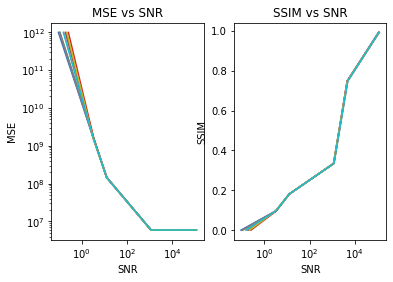

In [25]:
# make a version of the plot showing SNR instead of scale

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.loglog(snr,np.mean(mse1,1)) # Add annotations for the plot and axes
ax1.set_title('MSE vs SNR')
ax1.set_xlabel('SNR')
ax1.set_ylabel('MSE')

ax2.semilogx(snr,np.mean(ssim1,1))
ax2.set_title('SSIM vs SNR')
ax2.set_xlabel('SNR')
ax2.set_ylabel('SSIM')

# Diffusion filter

In [26]:
def anisodiff(img,niter=1,kappa=50,gamma=0.1,step=(1.,1.),sigma=0.0,option=1,ploton=False):
    """
    Anisotropic diffusion.

    Usage:
    imgout = anisodiff(im, niter, kappa, gamma, option)

    Arguments:
            img    - input image
            niter  - number of iterations
            kappa  - conduction coefficient 20-100 ?
            gamma  - max value of .25 for stability
            step   - tuple, the distance between adjacent pixels in (y,x)
            option - 1 Perona Malik diffusion equation No 1
                     2 Perona Malik diffusion equation No 2
            ploton - if True, the image will be plotted on every iteration

    Returns:
            imgout   - diffused image.

    kappa controls conduction as a function of gradient.  If kappa is low
    small intensity gradients are able to block conduction and hence diffusion
    across step edges.  A large value reduces the influence of intensity
    gradients on conduction.

    gamma controls speed of diffusion (you usually want it at a maximum of
    0.25)

    step is used to scale the gradients in case the spacing between adjacent
    pixels differs in the x and y axes

    Diffusion equation 1 favours high contrast edges over low contrast ones.
    Diffusion equation 2 favours wide regions over smaller ones.

    Reference: 
    P. Perona and J. Malik. 
    Scale-space and edge detection using ansotropic diffusion.
    IEEE Transactions on Pattern Analysis and Machine Intelligence, 
    12(7):629-639, July 1990.

    Original MATLAB code by Peter Kovesi  
    School of Computer Science & Software Engineering
    The University of Western Australia
    pk @ csse uwa edu au
    <http://www.csse.uwa.edu.au>

    Translated to Python and optimised by Alistair Muldal
    Department of Pharmacology
    University of Oxford
    <alistair.muldal@pharm.ox.ac.uk>

    June 2000  original version.       
    March 2002 corrected diffusion eqn No 2.
    July 2012 translated to Python

    February 2020 Revised for Python 3.6 / A. Kaestner
    """

    # ...you could always diffuse each color channel independently if you
    # really want
    if img.ndim == 3:
        warnings.warn("Only grayscale images allowed, converting to 2D matrix")
        img = img.mean(2)

    # initialize output array
    img = img.astype('float32')
    imgout = img.copy()

    # initialize some internal variables
    deltaS = np.zeros_like(imgout)
    deltaE = deltaS.copy()
    NS = deltaS.copy()
    EW = deltaS.copy()
    gS = np.ones_like(imgout)
    gE = gS.copy()

    # create the plot figure, if requested
    if ploton:
        import matplotlib.pyplot as plt
        from time import sleep

        plt.figure(figsize=(20,5.5),num="Anisotropic diffusion")
        plt.subplot(1,3,1)
        plt.imshow(img,interpolation='nearest')
        plt.title('Original')
        plt.colorbar()

        
    for ii in np.arange(0,niter):
        smoothimgout = imgout
        
        if sigma != 0 :
            smoothimgout = filters.gaussian(imgout, sigma)         ###### Introduce gradient smoothing here 
            
        # calculate the diffs
        deltaS[:-1,: ] = np.diff(smoothimgout,axis=0)
        deltaE[: ,:-1] = np.diff(smoothimgout,axis=1)
        

        # conduction gradients (only need to compute one per dim!)
        if option == 1:
            gS = np.exp(-(deltaS/kappa)**2.)/step[0]
            gE = np.exp(-(deltaE/kappa)**2.)/step[1]
        elif option == 2:
            gS = 1./(1.+(deltaS/kappa)**2.)/step[0]
            gE = 1./(1.+(deltaE/kappa)**2.)/step[1]

        # update matrices
        E = gE*deltaE
        S = gS*deltaS

        # subtract a copy that has been shifted 'North/West' by one
        # pixel. don't as questions. just do it. trust me.
        NS[:] = S
        EW[:] = E
        NS[1:,:] -= S[:-1,:]
        EW[:,1:] -= E[:,:-1]

        # update the image
        imgout += gamma*(NS+EW)

    if ploton:
        iterstring = "Iteration %i" %(ii+1)
        plt.subplot(1,3,2)
        plt.imshow(imgout)
        plt.title(iterstring)
        plt.colorbar()
        
        plt.subplot(1,3,3)
        plt.imshow(img-imgout)
        plt.title('Difference before - after')


    return imgout

In [27]:
# diffusion filter

scales = [0.1, 0.5, 1, 10, 20]


niter=1
kappa=0.005  
gamma=2
step=(0.0025, 0.0025) 
option=1  # select weighing equation
ploton=False
Ntests = 10;

# initialize arrays for results
mse1 = np.zeros((len(scales), Ntests), dtype = np.float32)
ssim1 = np.zeros((len(scales), Ntests), dtype = np.float32)
snr = np.zeros((len(scales), Ntests), dtype = np.float32)
from scipy.ndimage.filters import uniform_filter
current_filter = lambda img: anisodiff(img, niter=niter, kappa=kappa, gamma=gamma, step=step, option=option,ploton=ploton)

# Identify the region for SNR calculation
x1 = 0
x2 = 75
y1 = 0
y2 = 75

for i, c_scale in enumerate(scales):
    for j in range(Ntests):
        x = current_filter(d+c_scale*np.random.uniform(-c_scale, c_scale, size = d.shape))
        # extract a sub image
        sub=x[x1:x2,y1:y2];
        snr[i,j]=np.mean(sub)/np.std(sub) # compute the snr
        mse1[i,j]=mse(d,x);
        ssim1[i,j]=ssim(d,x);    
    # Add some lines here to display the latest image in a subplot

/Users/kaestner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.


Text(0, 0.5, 'SSIM')

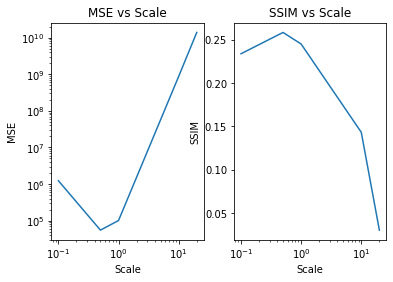

In [28]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.loglog(scales,np.mean(mse1,1)) # Add annotations for the plot and axes
ax1.set_title('MSE vs Scale')
ax1.set_xlabel('Scale')
ax1.set_ylabel('MSE')

ax2.semilogx(scales,np.mean(ssim1,1))
ax2.set_title('SSIM vs Scale')
ax2.set_xlabel('Scale')
ax2.set_ylabel('SSIM')

Text(0, 0.5, 'SSIM')

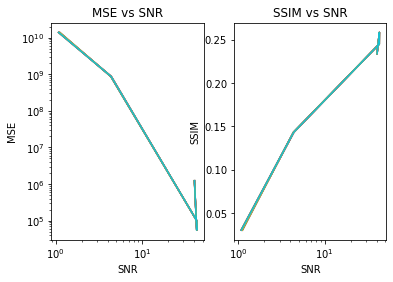

In [29]:
# make a version of the plot showing SNR instead of scale

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.loglog(snr,np.mean(mse1,1)) # Add annotations for the plot and axes
ax1.set_title('MSE vs SNR')
ax1.set_xlabel('SNR')
ax1.set_ylabel('MSE')

ax2.semilogx(snr,np.mean(ssim1,1))
ax2.set_title('SSIM vs SNR')
ax2.set_xlabel('SNR')
ax2.set_ylabel('SSIM')